In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas
import os
import seaborn as sns

import tissue.api as tissue

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/schuerch/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/schuerch/"


# Overall

In [8]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/schuerch/"

### Grade


In [4]:
source_path={
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE": base_path_gcn,
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE": base_path_mi,
        "2205181007_REG_GRADE_STANDARD_schuerch_": base_path_reg,
    }

gs_ids=[
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
        "2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE",
        "2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE",
        "2205181007_REG_GRADE_STANDARD_schuerch_"
    ]

In [5]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container.load_gs()

loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation
loaded 2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 4 runs with 6-fold cross validation
loaded 2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE: 4 runs with 6-fold cross validation
loaded 2205181007_REG_GRADE_STANDARD_schuerch_: 72 runs with 6-fold cross validation


In [6]:
sns.set_palette("gray_r")

selected ['model_class']
means=model_class
GCN      0.489583
GCNSS    0.531250
MI       0.562500
MLP      0.468750
Name: test_Group_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_molecular v.s. MI_molecular: t-test independent samples, P_val=4.584e-01 stat=-7.712e-01
MI_molecular v.s. GCN_molecular: t-test independent samples, P_val=5.177e-01 stat=6.705e-01
MI_molecular v.s. GCNSS_molecular: t-test independent samples, P_val=7.732e-01 stat=2.962e-01


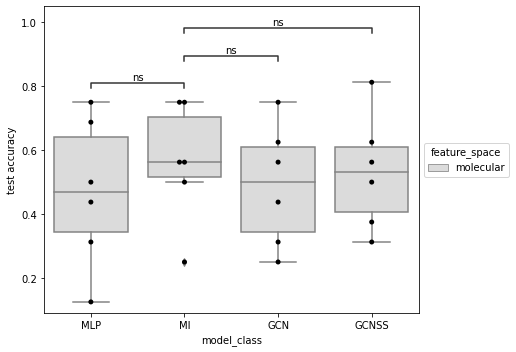

In [7]:
group_name="Group"
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"fig2a_refactored_ind", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
    ttest = True,
)

#### molecular analysis

In [9]:
container_std = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
    
)
container_std.load_gs()

loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation
loaded 2205170846_GCNSS_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 4 runs with 6-fold cross validation
loaded 2205061328_GCN_SPECTRAL_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205090901_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205160858_GCN_NONE_GROUP_STANDARD_schuerch_RADIUS_NONE: 36 runs with 6-fold cross validation
loaded 2205170856_MI_NONE_GRADE_STANDARD_schuerch_RADIUS_NONE: 4 runs with 6-fold cross validation
loaded 2205181007_REG_GRADE_STANDARD_schuerch_: 72 runs with 6-fold cross validation


In [10]:
import sklearn.metrics

In [11]:
sns.set_palette('colorblind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=7.645e-01 stat=3.034e-01
MI v.s. GCN: t-test independent samples, P_val=9.295e-01 stat=8.943e-02
MI v.s. GCNSS: t-test independent samples, P_val=2.520e-01 stat=-1.176e+00


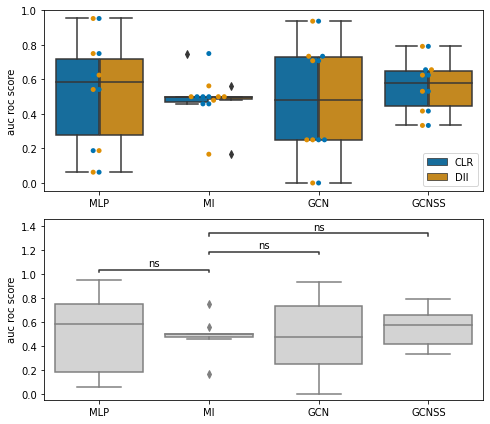

In [12]:
## history is not in the container info --> there is a get in get_info regarding getting cv training histories
group_name="Group"
container_std.plot_best_model_roc_auc(
    partition_show="test",
#     metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    load_labels=[group_name],
    data_key="sch",
    plot_all_groups=True,
    ttest=True,
#     save=dir_figures+"fig2b_refactored_test_on_train_auc_all_groups"
)

#### GCN SS

In [13]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK": base_path_gcn,
        
    },
    gs_ids=[
        "2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK",
    ]
)
container_gcnss.load_gs()

loaded 2205160857_GCNSS_NONE_GROUP_STANDARD_schuerch_RADIUS_MULTITASK: 36 runs with 6-fold cross validation


In [14]:
group_name="Group"
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id, load_labels=[group_name])

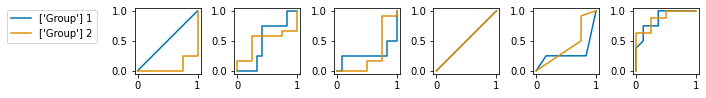

In [17]:
sns.set_palette("colorblind")
container_gcnss.plot_roc(partition='test', load_labels=["Group"])#, save=dir_figures+"supp_test_roc_on_train.pdf")

In [18]:
interpreter = tissue.fits.InterpreterGraph(results_path=base_path_gcn + gs_id + "/results/", cv=cv, model_id=model_id, model_class="GCNSS")
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/"
interpreter.get_data_again(
    data_path=data_path,
    buffered_data_path=buffered_data_path,
)

2022-08-19 15:26:39.023961: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer//buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.


/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l


Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 124 images from 31 patients.
Validation dataset: 0 images from 0 patients.



In [19]:
preds = np.argmax(container_gcnss.info[interpreter.cv]['predictions']['train']['Group'], axis=1)
true = np.argmax(container_gcnss.true_labels[interpreter.cv]['train']['Group'], axis=1)
acc = preds == true

idx = interpreter.img_keys_train
degrees = [np.mean(interpreter.data.img_celldata[image_key].obsp['adjacency_matrix_connectivities'].sum(axis=1))
            for image_key in idx]

In [20]:
nodes_sorted = np.sort(degrees)
order = np.argsort(degrees)
acc_sorted = np.array(acc)[order]
true_sorted = np.array(true)[order]

In [21]:
sns.set_palette("colorblind")

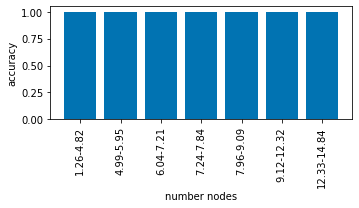

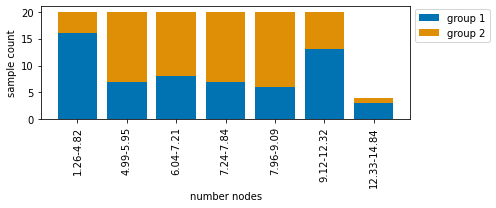

In [22]:
size = 20
accs = []
labels = []
plt.figure(figsize=(5,3))
a = []
b = []
c = []
for i in range(len(order)//size):
    accs.append(np.mean(acc_sorted[i*size:(i+1)*size]))
    labels.append(str(np.round(nodes_sorted[i*size], 2)) + '-' + str(np.round(nodes_sorted[(i+1)*size-1],2)))
    a.append(np.sum(true_sorted[i*size:(i+1)*size] == 0))
    b.append(np.sum(true_sorted[i*size:(i+1)*size] == 1))
accs.append(np.mean(acc_sorted[len(order)//size*size:]))
labels.append(str(np.round(nodes_sorted[len(order)//size*size],2)) + '-' + str(np.round(nodes_sorted[-1], 2)))
a.append(np.sum(true_sorted[len(order)//size*size:] == 0))
b.append(np.sum(true_sorted[len(order)//size*size:] == 1))
plt.bar(height=accs, x=np.arange(len(accs)))
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.xlabel('number nodes')
plt.ylabel('accuracy')
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_acc_nr_nodes.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()
#     plt.savefig(save + '_acc_nr_nodes.pdf')
    
plt.figure(figsize=(7,3))
plt.bar(x=np.arange(len(accs)), height=a, label='group 1')
plt.bar(x=np.arange(len(accs)), height=b, bottom=a, label='group 2')
# plt.bar(x=np.arange(len(accs)), height=c, bottom=np.array(a) + np.array(b), label='grade 3')
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.xlabel('number nodes')
plt.ylabel('sample count')
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_nr_nodes_val.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()


2022-08-19 15:31:33.358044: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-19 15:31:33.360027: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700000000 Hz
/home/iterm/mayar.ali/phd/projects/tissue/tissue/interpretation/interpreter.py:374: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  labels = list(np.array(labels)[[[l in label_names for l in labels]]])


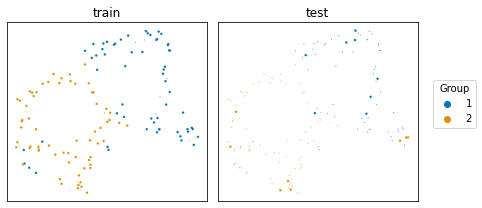

In [23]:
interpreter.plot_umap_graphs(
    label='Group',
    data_key='sch',
#     save=dir_figures+'fig3c_refactored'
)

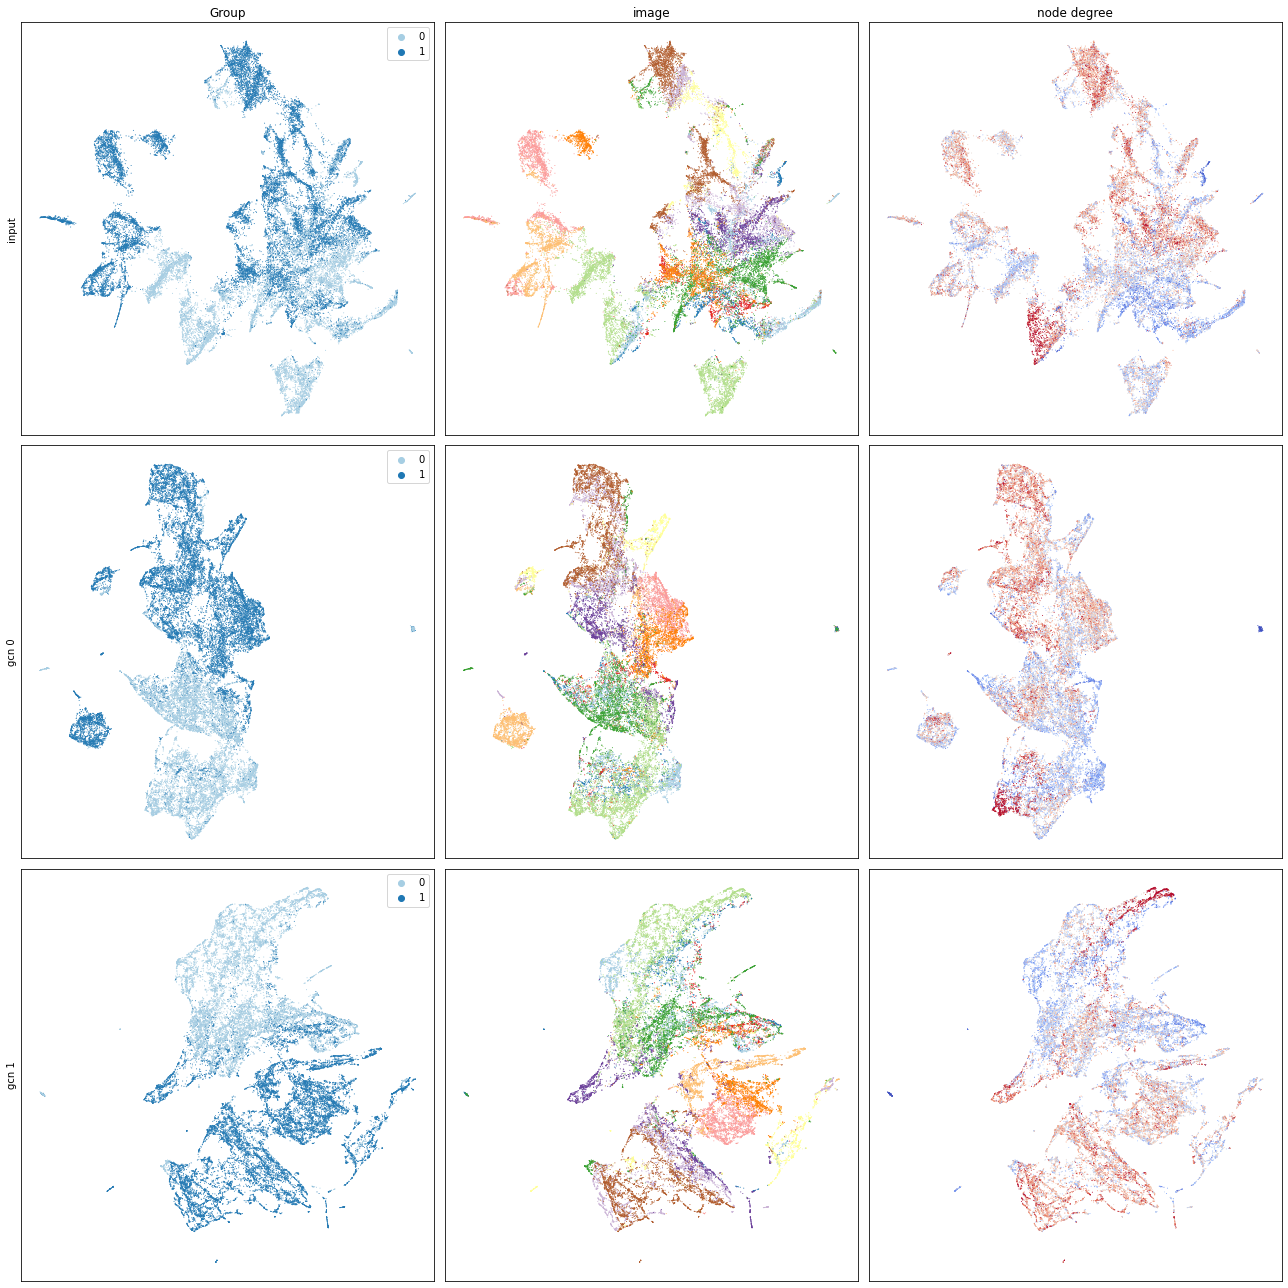

In [24]:
interpreter.plot_umap_nodes(
    interpreter.img_keys_test,
    plot_types = ['Group', 'images', 'degree'],
    layer_names=[
        'input',
        'Layer_gcn_0',
        'Layer_gcn_1',
    ],
    panel_width=6.0,
    panel_height=6.0,
    data_key='sch',
#     save=dir_figures+"supp_std_node_emb_refactored", 
)

/home/iterm/mayar.ali/phd/projects/tissue/tissue/interpretation/interpreter.py:944: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['', 'Group 1', 'Group 2'])


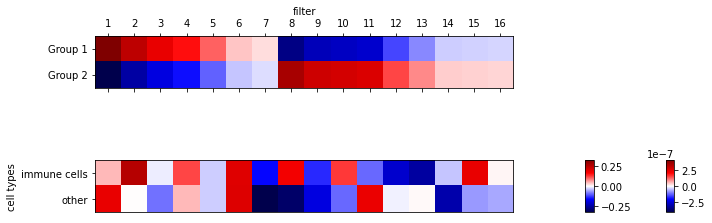

In [25]:
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label='Group',
    panel_width=10,
    panel_height=10,
#     save=dir_figures+"fig3c_std_filters_refactored_reversed", 
)


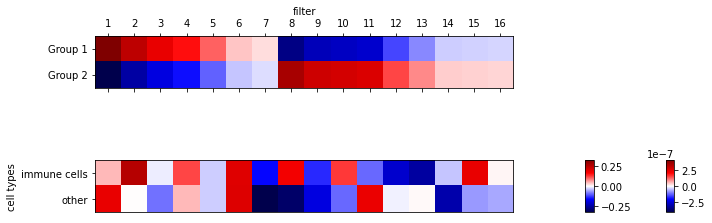

In [26]:
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label='Group',
    panel_width=10,
    panel_height=10,
#     save=dir_figures+"fig3c_std_filters_refactored", 
)


In [27]:
sns.set_palette('colorblind')

Confusion matrix on test set:


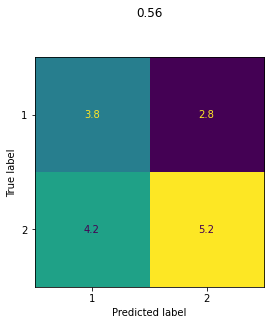

Confusion matrix on train set:


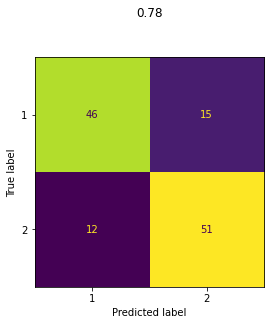

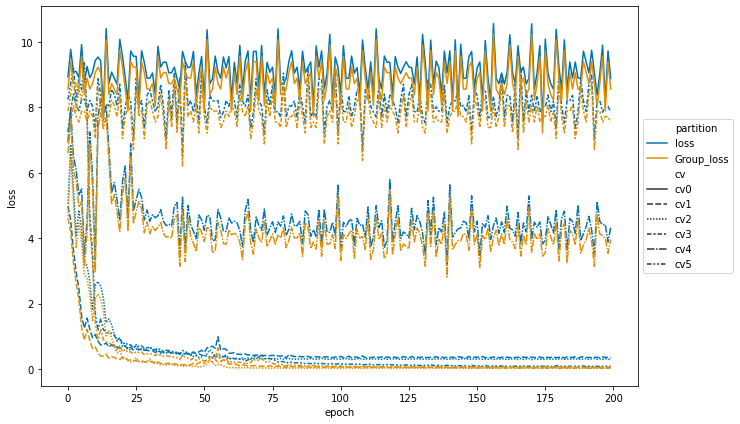


test
Group 1 : 0.4791666666666667
Group 2 : 0.5208333333333334
mean : 0.5625

train
Group 1 : 0.7552083333333334
Group 2 : 0.8250000000000001
mean : 0.7836021505376344


In [28]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='Group',
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored", 
    x_ticks=['1', '2'],
)


print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='Group',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_train_refactored",
#     save=save,
    x_ticks=['1', '2']
)

container_gcnss.plot_training_history(
    plot_metrics=['loss', 'Group_loss'],
#     save=dir_figures+"supp6_std_history_refactored",
#     save=save,
)


for partition in ['test', 'train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['Group'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['Group'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Group", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)